# 이미지 윤곽선 작업(open_CV)

In [28]:
import os,glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import cv2
print(cv2.__version__)

4.2.0


In [29]:
# 기준값을 넘었을 때 적용할 최대값
maxval = 255
# 기준값
thresh = maxval / 2

In [30]:
255/2

127.5

```py
cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# cv2.threshold(src, thresh, maxval, type)
Parameters:	
        src – input image로 single-channel 이미지.(grayscale 이미지)
        thresh – 임계값
        maxval – 임계값을 넘었을 때 적용할 value
        type – thresholding type
                - cv2.THRESH_BINARY
                - cv2.THRESH_BINARY_INV
                - cv2.THRESH_TRUNC
                - cv2.THRESH_TOZERO
                - cv2.THRESH_TOZERO_INV
```

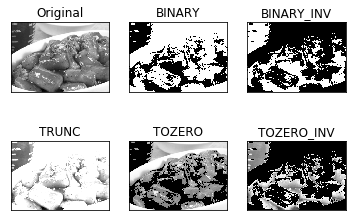

In [31]:
img = cv2.imread('Img_082_0020.jpg',0)

ret, thresh1 = cv2.threshold(img,thresh,maxval, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,thresh,maxval, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,thresh,maxval, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,thresh,maxval, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,thresh,maxval, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

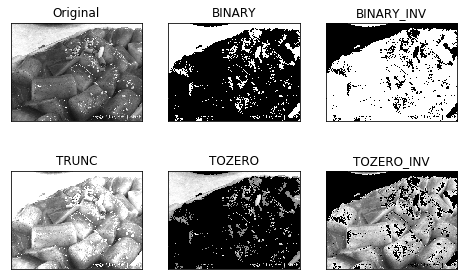

In [32]:
img = cv2.imread('Img_082_0015.jpg',0)

ret, thresh1 = cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

plt.figure(figsize=(8, 5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

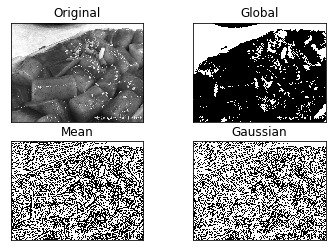

In [33]:
img = cv2.imread('Img_082_0015.jpg',0)
# img = cv2.medianBlur(img,5)

ret, th1 = cv2.threshold(img,thresh, maxval,cv2.THRESH_BINARY)



th2 = cv2.adaptiveThreshold(img,maxval,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,maxval,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [34]:
src = cv2.imread("Img_082_0015.jpg",0)
ret, binary = cv2.threshold(src, 127, 255, cv2.THRESH_TOZERO)
binary = cv2.bitwise_not(binary) #  이진화 이미지

In [35]:
# cv2.findContours()를 이용하여 이진화 이미지에서 윤곽선(컨투어)를 검색
# cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)
contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

In [36]:
# # 테스트 필요
# for i in range(len(contours)):
#     cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
#     cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
# #     print(i, hierachy[0][i])
    
# plt.subplot(1,1,1)
# plt.imshow(src)

In [37]:
for i in range(len(contours)):
    # 윤곽선(검출된 윤곽선들이 저장된 Numpy 배열)을 그린다.
    # cv2.drawContours(이미지, [윤곽선], 윤곽선 인덱스, (B, G, R), 두께, 선형 타입)
    cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    #print(i, hierachy[0][i])
    cv2.imshow("src", src)

cv2.waitKey(0)    
cv2.destroyAllWindows()

In [38]:
#gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(src, thresh, maxval, cv2.THRESH_TOZERO)
binary = cv2.bitwise_not(binary) #  이진화 이미지

In [39]:
# cv2.findContours()를 이용하여 이진화 이미지에서 윤곽선(컨투어)를 검색
# cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)
contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

In [40]:
np.squeeze(contours[0])[:5]

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4]], dtype=int32)

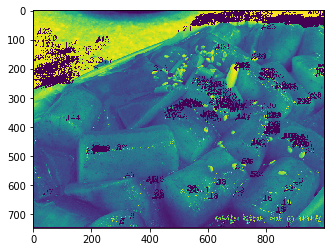

In [41]:
plt.imshow(src)

In [42]:
src = cv2.imread('Img_082_0015.jpg',0)
ret, binary = cv2.threshold(src, thresh, maxval, cv2.THRESH_TOZERO)
binary = cv2.bitwise_not(binary) #  이진화 이미지
contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    #print(i, hierachy[0][i])
    cv2.imshow("src", src)

cv2.waitKey(0)    
cv2.destroyAllWindows()

In [45]:
# cv2.THRESH_BINARY
for i in tmp:
    src = cv2.imread(i,0)
    ret, binary = cv2.threshold(src, thresh, maxval, cv2.THRESH_BINARY)
    binary = cv2.bitwise_not(binary) #  이진화 이미지
    contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    
    for i in range(len(contours)):
        cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
        cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
        #print(i, hierachy[0][i])
                
        plt.subplot(3,2,1)
        plt.imshow( src)
        
        plt.subplot(3,2,2)
        plt.imshow(outline, cmap='gray')
#         cv2.imshow("src", src)
        
#     cv2.waitKey(0)    
#     cv2.destroyAllWindows()